# Relationship between Vote Average, Popularity and Profit Margin for Movies (2010 - 2020)

### Overview

We want to know if vote average, popularity, and profit margin are correlated with each other.

Using the TMDB Database, we first compared the vote average and popularity for movies between 2010 and 2020. We then used the TN Movie Budget Database to compare vote average and popularity with the profit margin.

### Datasets Analyzed
- TN movie budgets
- TMDB movies

### Import Necessary Libraries

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import TMDB Movies Dataset

In [459]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', 
                          compression='gzip', 
                          header=0, 
                          sep=',', 
                          quotechar='"', 
                          error_bad_lines=False, 
                          index_col=0)
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [460]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


### Filtered dataset higher than 190 vote counts and movies that have been released in past 10 years

We filtered for movies that had above the average vote count of 190 to exclude movies that have high voting averages with low vote counts. We analyzed only movies released in the past 10 years due to box office numbers being a lot lower in previous decades which may drag the average box office numbers down.

In [461]:
#Find the average vote count for all movies in the past 10 years
tmdb_movies.loc[tmdb_movies['release_date'] > '2010-01-01'].describe()

,id,popularity,vote_average,vote_count
count,26022.000000,26022.000000,26022.000000,26022.000000
mean,298230.630620,3.113565,5.992253,189.232726
std,152145.893323,4.319625,1.851955,943.796552
min,189.000000,0.600000,0.000000,1.000000
25%,164657.750000,0.600000,5.000000,2.000000
50%,314128.000000,1.377500,6.000000,5.000000
75%,421398.250000,3.684500,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [462]:
#filter the tmdb movies with vote count above 190 and release date after 2010
filtered_tmdb_movies = tmdb_movies.loc[(tmdb_movies['vote_count'] > 190) & 
                                       (tmdb_movies['release_date'] > '2010-01-01'), 
                                       ['original_title','popularity','vote_average','release_date']]
filtered_tmdb_movies.head()

,original_title,popularity,vote_average,release_date
0,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,2010-11-19
1,How to Train Your Dragon,28.734,7.7,2010-03-26
2,Iron Man 2,28.515,6.8,2010-05-07
4,Inception,27.920,8.3,2010-07-16
5,Percy Jackson & the Olympians: The Lightning T...,26.691,6.1,2010-02-11


### Removed Duplicates from Dataset

In [463]:
#Find the total number of duplicates based on title
print('Number of Duplicates:', filtered_tmdb_movies['original_title'].duplicated().sum())

Number of Duplicates: 241


In [464]:
#Drop duplicates
filtered_tmdb_movies.drop_duplicates(inplace=True)

#Check duplicates were dropped
print('Duplicates Remaining:', filtered_tmdb_movies.duplicated().sum())

Duplicates Remaining: 0


### Descriptive Statistics for Popularity & Vote Average

In [465]:
filtered_tmdb_movies.describe()

,popularity,vote_average
count,2412.000000,2412.000000
mean,12.376893,6.404643
std,6.722986,0.818312
min,0.600000,3.700000
25%,8.236500,5.900000
50%,10.322000,6.400000
75%,14.377250,7.000000
max,80.773000,8.600000


### Top 10 Popular and Highest Rated Movies (2010 - 2020)

At a quick glance between the top 10 Popular Movies and top 10 Highly Rated Movies, not all of the movies are the same. We can assume that Popularity and Highly Rated will not have a strong positive correlation.

In [466]:
top_10_popularity = filtered_tmdb_movies.loc[:,['original_title','popularity']].sort_values(by='popularity',ascending=False).head(10)
top_10_vote_average = filtered_tmdb_movies.loc[:,['original_title','vote_average']].sort_values(by='vote_average',ascending=False).head(10)

display(top_10_popularity)
display(top_10_vote_average)

,original_title,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289
11021,Guardians of the Galaxy,49.606
20617,Blade Runner 2049,48.571
23814,Fantastic Beasts: The Crimes of Grindelwald,48.508
23815,Ralph Breaks the Internet,48.057
20618,Spider-Man: Homecoming,46.775


,original_title,vote_average
17389,君の名は。,8.6
11031,Whiplash,8.4
23899,کفرناحوم,8.4
23812,Spider-Man: Into the Spider-Verse,8.4
21008,In a Heartbeat,8.3
23827,Green Book,8.3
24056,Won't You Be My Neighbor?,8.3
17466,아가씨,8.3
11142,Mommy,8.3
23811,Avengers: Infinity War,8.3


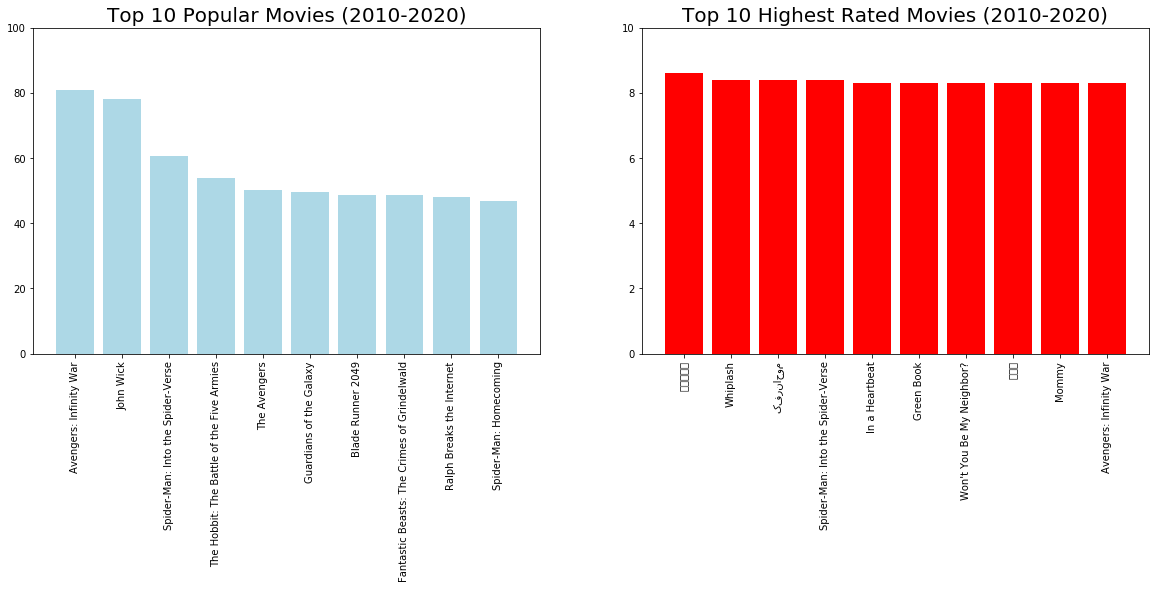

In [467]:
new_figure = plt.figure(figsize=(20,6))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.bar(top_10_popularity['original_title'],top_10_popularity['popularity'] , color='lightblue')
ax2.bar(top_10_vote_average['original_title'],top_10_vote_average['vote_average'], color='red')

ax.set_ylim(0,100)
ax.set_xticklabels(top_10_popularity['original_title'], rotation=90)
ax.set_title('Top 10 Popular Movies (2010-2020)',fontsize=20)

ax2.set_ylim(0,10)
ax2.set_xticklabels(top_10_vote_average['original_title'], rotation=90)
ax2.set_title('Top 10 Highest Rated Movies (2010-2020)',fontsize=20)

plt.show()



### Relationship Between Popularity and Vote Average

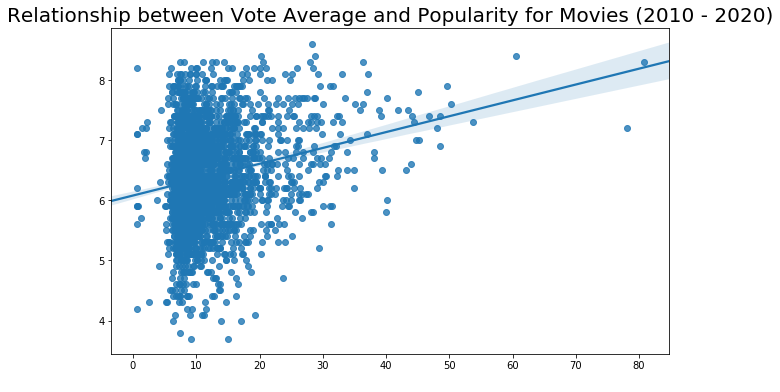

In [468]:
sns.set_style({'grid.color':'black',
               'axes.facecolor':'white',
               'figure.facecolor':'white',
               'axes.edgecolor':'black',
               'axes.labelcolor':'white',
               'xtick.color':'black',
               'ytick.color':'black'})
plt.figure(figsize=(10,6))
sns.regplot(x='popularity',y='vote_average',data=filtered_tmdb_movies)
plt.title('Relationship between Vote Average and Popularity for Movies (2010 - 2020)',fontsize=20)
plt.show()


In [469]:
correlation = filtered_tmdb_movies['popularity'].corr(filtered_tmdb_movies['vote_average'])
correlation

0.21661176140359314

### Import The Numbers Movie Budget Dataset

In [470]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Cleaning the Data

In [471]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$','').str.replace(',','').astype({'production_budget': 'int64'})
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$','').str.replace(',','').astype({'domestic_gross': 'int64'})
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$','').str.replace(',','').astype({'worldwide_gross': 'int64'})

In [472]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### Created New Column to Find the Gross Profit Margin

In [473]:
tn_movie_budgets['gross_profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

tn_movie_budgets.sort_values(by='gross_profit',ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000


### Merge the TMDB Database with TN Movie Budget Database

In [474]:
merged_data = pd.merge(filtered_tmdb_movies, filtered_tn_movie_budgets, 
                how='inner', right_on='movie', left_on='original_title')
merged_data.head()

,original_title,popularity,vote_average,release_date,movie,gross_profit
0,How to Train Your Dragon,28.734,7.7,2010-03-26,How to Train Your Dragon,329870992
1,Iron Man 2,28.515,6.8,2010-05-07,Iron Man 2,451156389
2,Inception,27.920,8.3,2010-07-16,Inception,675524642
3,Percy Jackson & the Olympians: The Lightning T...,26.691,6.1,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,128050874
4,Toy Story 3,24.445,7.7,2010-06-17,Toy Story 3,868879522


In [475]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 0 to 1351
Data columns (total 6 columns):
original_title    1352 non-null object
popularity        1352 non-null float64
vote_average      1352 non-null float64
release_date      1352 non-null object
movie             1352 non-null object
gross_profit      1352 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 73.9+ KB


### Descriptive Statistics for Vote Average and Gross Profit

In [476]:
merged_data.describe()

,popularity,vote_average,gross_profit
count,1352.000000,1352.000000,1.352000e+03
mean,14.291434,6.387204,1.110332e+08
std,7.673365,0.778081,2.018719e+08
min,0.600000,4.000000,-1.104502e+08
25%,9.321250,5.900000,2.580210e+06
50%,12.317000,6.400000,3.666356e+07
75%,16.639000,6.900000,1.235609e+08
max,80.773000,8.400000,1.748134e+09


### Plotting Relationship between Vote Average and Profit Margin

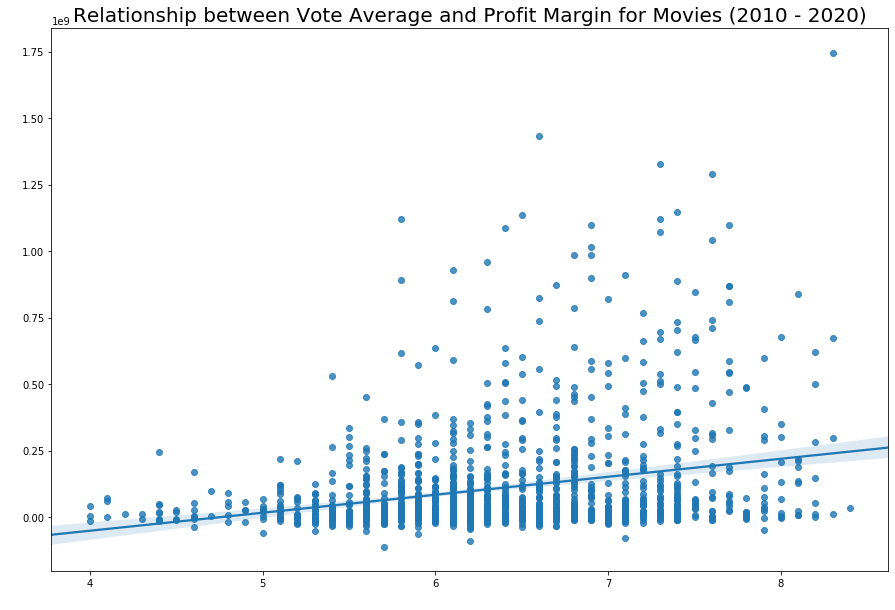

In [477]:
sns.set_style({'grid.color':'black',
               'axes.facecolor':'white',
               'figure.facecolor':'white',
               'axes.edgecolor':'black',
               'axes.labelcolor':'white',
               'xtick.color':'black',
               'ytick.color':'black'})
plt.figure(figsize=(15,10))
sns.regplot(x='vote_average',y='gross_profit',data=merged_data)
plt.title('Relationship between Vote Average and Profit Margin for Movies (2010 - 2020)',fontsize=20)
plt.show()



In [478]:
correlation = merged_data['vote_average'].corr(merged_data['gross_profit'])
correlation

0.26080800708972146

### Plotting Relationship between Popularity and Profit Margin

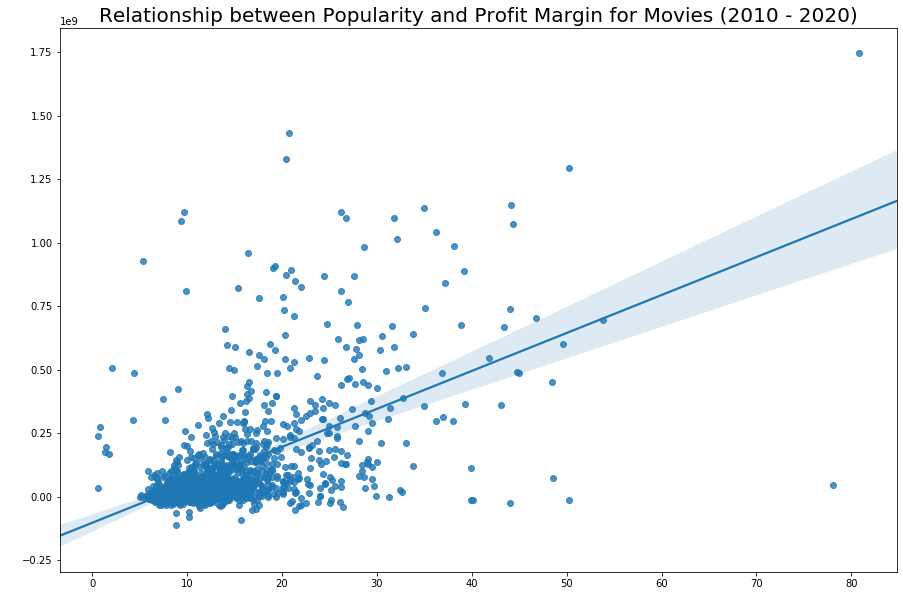

In [479]:
sns.set_style({'grid.color':'black',
               'axes.facecolor':'white',
               'figure.facecolor':'white',
               'axes.edgecolor':'black',
               'axes.labelcolor':'white',
               'xtick.color':'black',
               'ytick.color':'black'})
plt.figure(figsize=(15,10))
sns.regplot(x='popularity',y='gross_profit',data=merged_data)
plt.title('Relationship between Popularity and Profit Margin for Movies (2010 - 2020)',fontsize=20)
plt.show()

In [480]:
correlation = merged_data['popularity'].corr(merged_data['gross_profit'])
correlation

0.5683545689919102

### Conclusion

All three relationships have positive relationships.

- Popularity and Vote Average (0.22)
- Vote Average and Profit Margin (0.26)
- Popularity and Profit Margin (0.56)

Popularity and Profit Margin had the highest correlation among the three relationships. If a movie has high popularity, there would be an increase in profit margin which account for more than half of the movies in the past decade.